In [1]:
!pip install pywedge

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 74.9 MB/s eta 0:00:00


In [2]:
!pip install kora
from kora.xattr import get_id

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.7/57.7 kB 1.7 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
dt=pd.read_excel("/content/drive/MyDrive/prueba_2.xlsx")

In [ ]:
import pandas as pd
# Filtra las observaciones que no tienen fechas NaT
dt_2 = dt[~dt['fecha_at_orace'].isna()]

In [3]:
import pandas as pd
# Cambia 'nombre_archivo.dta' al nombre real de tu archivo
nombre_archivo = 'proof_1.dta'
# Lee el archivo .dta en un DataFrame de pandas
dt = pd.read_stata(nombre_archivo)

In [ ]:
#no se necesita
#from google.colab import auth
#import gspread
#from google.auth import default
#autenticating to google
#auth.authenticate_user()
#creds, _ = default()
#gc = gspread.authorize(creds)

In [ ]:
#no se necesita
#para abrir sheets de google
#import pandas as pd
#defining my worksheet
#worksheet = gc.open('prueba_1').sheet1
#get_all_values gives a list of rows
#rows = worksheet.get_all_values()
#Convert to a DataFrame
#df = pd.DataFrame(rows)

In [ ]:
#from google.colab import files
#df.to_csv('filename_10.csv')
#files.download('filename_10.csv')
#dt=pd.read_csv("filename_10.csv",header=1)
#dt

In [ ]:
#dt=pd.read_excel("prueba_2_1.xls",header=0)

In [4]:
dt['fecha_in_orace_nuevo'] = dt['fecha_in_orace'].astype('datetime64[ns]')
dt['fecha_at_orace_nuevo'] = dt['fecha_at_orace'].astype('datetime64[ns]')
#df['fecha_in_orace_nuevo'] = df['fecha_in_orace_nuevo'].dt.strftime('%d-%m-%Y')
#df['fecha_at_orace_nuevo'] = df['fecha_at_orace_nuevo'].dt.strftime('%d-%m-%Y')
dt['dias_nornal'] =  (dt['fecha_at_orace_nuevo'] - dt['fecha_in_orace_nuevo']).dt.days
#def date_diff(fecha_in_orace, fecha_at_orace):
#    return (fecha_in_orace -  fecha_at_orace)
#date_diff

import numpy as np
from pandas.tseries.offsets import BDay
# Convertir las columnas de fechas al formato datetime
dt['FechaInicio'] = pd.to_datetime(dt['fecha_in_orace'])
dt['FechaFin'] = pd.to_datetime(dt['fecha_at_orace'])
# Calcular la diferencia en días laborables y agregar como nueva columna
dt['dias_festivos'] = pd.to_datetime(dt['dias_festivos'])
dt['DiasLaborables'] = np.busday_count(dt['FechaInicio'].values.astype('datetime64[D]'),
                                       dt['FechaFin'].values.astype('datetime64[D]'),
                                       holidays=dt['dias_festivos'].values.astype('datetime64[D]'))

In [ ]:
#dt_2['fecha'] = pd.to_datetime(dt_2['fecha'])
#dt_2['fecha_nuevo_formato'] = dt_2['fecha'].dt.strftime('%d %B %Y')

In [ ]:
#dt.drop(dt.columns[0], axis=1, inplace=True)

In [ ]:
#from google.colab import files
#dt.to_csv('final_6.csv',encoding='utf-8',index=False)
#files.download('final_6.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#ESTO SECCION ESTA CORRIENDO
#import pandas as pd
#ruta_archivo = 'prueba2.xlsx'
#df = pd.read_excel(ruta_archivo,header=0)
#df['dias_nornal'] =  (df['Fecha1	'] - df['Fecha2']).dt.days

#df['fecha_in_orace_nuevo'] = df['fecha_in_orace'].astype('datetime64[ns]')
#df['fecha_at_orace_nuevo'] = df['fecha_at_orace'].astype('datetime64[ns]')
#df['fecha_in_orace_nuevo'] = df['fecha_in_orace_nuevo'].dt.strftime('%d-%m-%Y')
#df['fecha_at_orace_nuevo'] = df['fecha_at_orace_nuevo'].dt.strftime('%d-%m-%Y')
#df['dias_nornal'] =  (df['fecha_at_orace_nuevo'] - df['fecha_in_orace_nuevo']).dt.days
#def date_diff(fecha_in_orace, fecha_at_orace):
#    return (fecha_in_orace -  fecha_at_orace)
#date_diff

#import numpy as np
#from pandas.tseries.offsets import BDay
# Convertir las columnas de fechas al formato datetime
#df['FechaInicio'] = pd.to_datetime(df['fecha_in_orace_nuevo'])
#df['FechaFin'] = pd.to_datetime(df['fecha_at_orace_nuevo'])
# Calcular la diferencia en días laborables y agregar como nueva columna
#df['dias_festivos'] = pd.to_datetime(df['dias_festivos'])
#df['DiasLaborables'] = np.busday_count(df['FechaInicio'].values.astype('datetime64[D]'),
 #                                      df['FechaFin'].values.astype('datetime64[D]'),
 #                                      holidays=df['dias_festivos'].values.astype('datetime64[D]'))
# Mostrar el DataFrame actualizado



In [ ]:
#import pandas as pd
#import matplotlib.pyplot as plt

In [ ]:
#df = pd.read_csv("final_6.csv")

In [5]:
media = dt["DiasLaborables"].mean()
mediana = dt["DiasLaborables"].median()
moda = dt["DiasLaborables"].mode().values[0]

In [6]:
print("Media:", media)
print("Mediana:", mediana)
print("Moda:", moda)

Media: 3.2058823529411766
Mediana: 0.0
Moda: 0


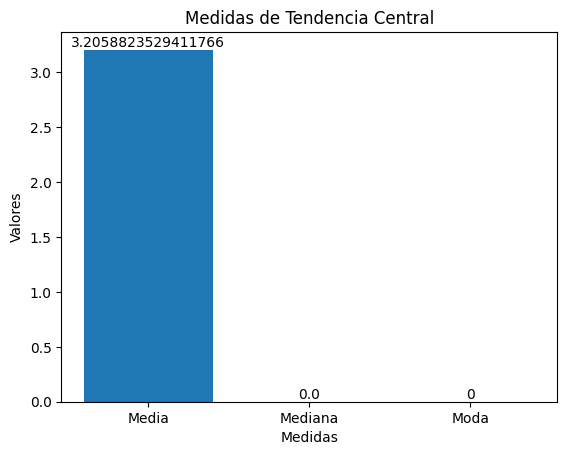

In [7]:
import matplotlib.pyplot as plt
medidas = {"Media": media, "Mediana": mediana, "Moda": moda}

plt.bar(medidas.keys(), medidas.values())
plt.xlabel("Medidas")
plt.ylabel("Valores")
plt.title("Medidas de Tendencia Central")

# Agregar etiquetas a las barras
for i, medida in enumerate(medidas.keys()):
    plt.text(i, medidas[medida], str(medidas[medida]), ha='center', va='bottom')
plt.show()

In [ ]:
import numpy as np
import scipy.stats as stats

medidas = {"Media": media, "Mediana": mediana, "Moda": moda}

# Crear una distribución normal para cada medida
x = np.linspace(df["DiasLaborables"].min(), df["DiasLaborables"].max(), 100)
for medida in medidas:
    dist = stats.norm(loc=medidas[medida], scale=df["DiasLaborables"].std())
    y = dist.pdf(x)
    plt.plot(x, y, label=medida)

plt.xlabel("Valores")
plt.ylabel("Densidad")
plt.title("Distribución Normal de Medidas de Tendencia Central")
plt.legend()
plt.show()

NameError: ignored

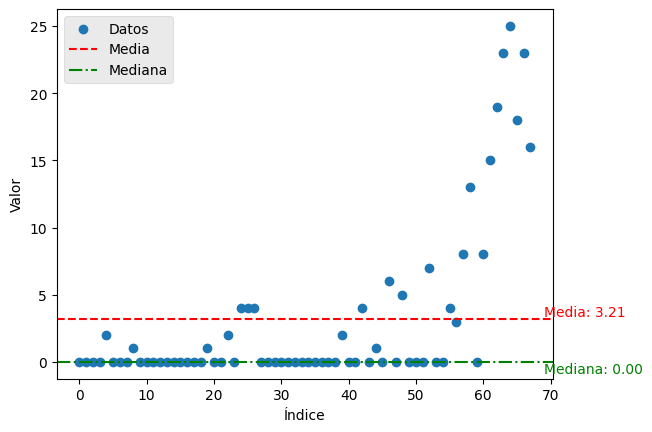

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# Extraer la columna de datos numéricos
datos = dt['DiasLaborables'].values
# Calcula la media y la mediana
media = np.mean(datos)
mediana = np.median(datos)
# Crea el gráfico de dispersión
plt.scatter(range(len(datos)), datos, label='Datos')
# Dibuja una línea vertical para la media
plt.axhline(media, color='r', linestyle='--', label='Media')
# Dibuja una línea vertical para la mediana
plt.axhline(mediana, color='g', linestyle='-.', label='Mediana')
#agregar color
plt.style.use('ggplot')
colors = ['#CC6677', '#117733']
# Agrega etiquetas a las medidas de tendencia central
plt.text(len(datos)+1, media, f'Media: {media:.2f}', va='bottom', ha='left', color='r')
plt.text(len(datos)+1, mediana, f'Mediana: {mediana:.2f}', va='top', ha='left', color='g')
# Configura las etiquetas y la leyenda
plt.xlabel('Índice')
plt.ylabel('Valor')
plt.legend()
# Muestra el gráfico
plt.show()

In [ ]:
import pandas as pd
df = pd.read_csv("final_6.csv")

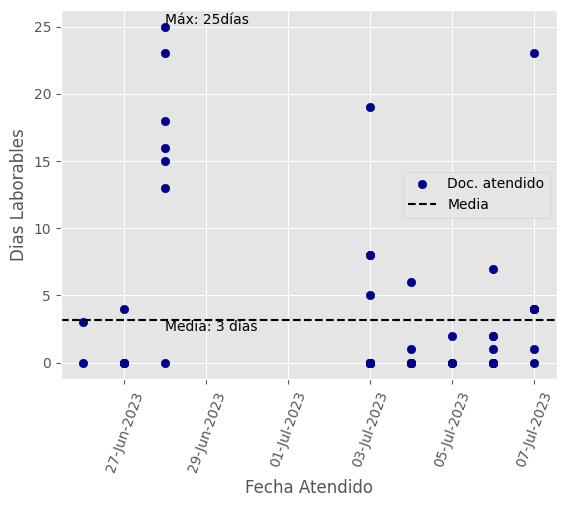

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
# Obtener las fechas y los valores numéricos
dt['fecha_at_orace'] = dt['fecha_at_orace'].astype('datetime64[ns]')
#df['fecha_at_orace'] = df['fecha_at_orace'].df.strftime('%d-%m-%Y')
fechas = dt['fecha_at_orace']
datos = dt['DiasLaborables']
# Calcular la media y la mediana
media = datos.mean()
mediana = datos.median()
#agregar color
plt.style.use('ggplot')
colors = ['#CC6677', '#117733']
# Agregar líneas horizontales adicionales
#plt.axhline(5, color='green', linestyle='-', label='Mínimo')
#plt.axhline(15, color='red', linestyle='-', label='Máximo')
#plt.axhline(1, color='green', linestyle='-', label='Mínimo')
#plt.axhline(2, color='red', linestyle='-', label='Máximo')
# Crear el gráfico de dispersión
plt.scatter(fechas, datos, label='Doc. atendido', color='darkblue')
# Dibujar una línea horizontal para la media (se descarta)
plt.axhline(media, color='black', linestyle='--', label='Media')
# Dibujar una línea horizontal para la mediana
#plt.axhline(mediana, color='black', linestyle='-.', label='Mediana')
# Agregar etiquetas a las medidas de tendencia central (se descarta la media)
#plt.text(fechas.iloc[-1], media, f'Media: {media:.2f}', va='bottom', ha='left', color='black')
# (esto es la version anteruior del sig cod)  plt.text(fechas.iloc[-1], mediana, f'Mediana: {mediana:.2f}', va='top', ha='left', color='black')
#plt.text(fechas.iloc[-1], mediana, f'Mediana: {mediana:.0f} días' , va='top', ha='left', color='black')
maximo_1 = dt['DiasLaborables'].max()
maximo=maximo_1
plt.text(fechas.iloc[-1], maximo, f'Máx: {maximo:.0f}días', va='bottom', ha='left', color='black')
minimo=5
plt.text(fechas.iloc[-1], media, f'Media: {media:.0f} días' , va='top', ha='left', color='black')
#maximo=2
#plt.text(fechas.iloc[-1], maximo, f'Máx: {maximo:.0f}días', va='bottom', ha='left', color='black')
#minimo=1
#plt.text(fechas.iloc[-1], minimo, f'Mín: {minimo:.0f}día', va='top', ha='left', color='white')
# Añadir etiquetas a las líneas horizontales
#plt.text(df['fecha'].min(), 8, 'Mínimo', color='magenta', verticalalignment='center')
#plt.text(df['fecha'].min(), 12, 'Máximo', color='magenta', verticalalignment='center')
# Configurar las etiquetas y la leyenda
plt.xlabel('Fecha Atendido')
plt.ylabel('Dias Laborables')
plt.legend()
# Rotar las etiquetas del eje x para una mejor visualización
#plt.xticks(rotation='vertical')
plt.xticks(rotation=70)
#plt.xticks(fechas[::1])  # Muestra un tick cada 30 días
#plt.yticks(datos[::10])  # Muestra un tick cada 30 días
# Mostrar el gráfico
# Formatear el eje horizontal con el formato de fecha
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%b-%Y'))
plt.show()
plt.savefig('seg_orace.jpg', format='jpg')


In [ ]:
#import pandas as pd
# Valor de referencia
valor_x = media
# Calcular la proporción de valores mayores a valor_x
#proporcion_mayores = len(dt[dt['DiasLaborables'] > valor_x]) / len(dt)
#proporcion_menores = len(dt[dt['DiasLaborables'] < valor_x]) / len(dt)

In [ ]:
porcentaje_superior_2 = (dt['DiasLaborables'] > media).mean()
porcentaje_inferior_1 = (dt['DiasLaborables'] < media).mean()

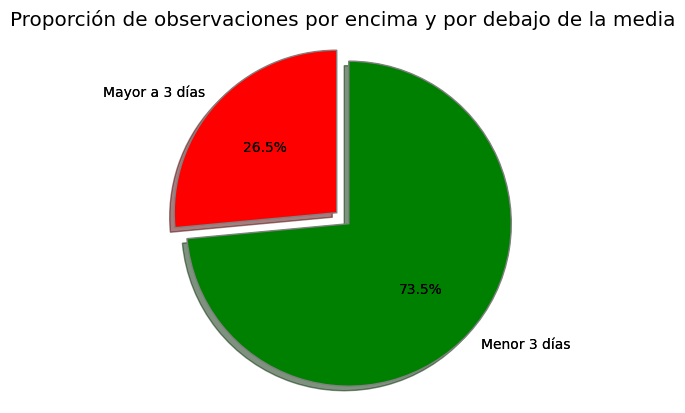

In [ ]:
#labels = ['Mayor a 15 días', 'Menor a 5 días']
labels = ['Mayor a'+ ' '+ str(round(media))+' ' + 'días', 'Menor' + ' ' + str(round(media))+' ' +  'días']
sizes = [porcentaje_superior_2, porcentaje_inferior_1]
colors = ['red', 'green']
explode = (0.1, 0)  # Explota la primera rebanada en un 10%
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, explode=explode)
wedgeprops = {'linewidth': 1, 'edgecolor': 'gray'}  # Agrega bordes grises
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, explode=explode, shadow=True, wedgeprops=wedgeprops)
#plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Para que el gráfico sea circular
plt.title('Proporción de observaciones por encima y por debajo de la media')
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

#cantidad_documentos = df.groupby('responsable_final_1')['expediente'].count()
cantidad_documentos = df.groupby('responsable_final')['expediente'].count()

cantidad_documentos_sorted = cantidad_documentos.sort_values(ascending=False)
cantidad_documentos_sorted

# Calcular el tiempo promedio por trabajador
#tiempo_promedio = df.groupby('responsable_final_1')['DiasLaborables'].median()
#tiempo_promedio = df.groupby('responsable_final')['DiasLaborables'].median()

# Ordenar los trabajadores por tiempo promedio en orden ascendente
#tiempo_promedio = tiempo_promedio.sort_values()

# Crear el gráfico de barras
#plt.bar(range(len(tiempo_promedio)), tiempo_promedio.values)

# Configurar los ejes y las etiquetas
#plt.xlabel('Trabajador')
#plt.ylabel('Tiempo promedio')
#plt.xticks(range(len(tiempo_promedio)), tiempo_promedio.index, rotation='vertical')


# Agregar etiquetas de tiempo promedio
#for i, tiempo in enumerate(tiempo_promedio.values):
#    plt.text(i, tiempo + 0.5, f'{tiempo:.2f}', ha='center', color='black')

# Agregar etiquetas de cantidad de documentos ingresados
#cantidad_documentos = df.groupby('responsable_incial')['expediente'].count()
#for i, cantidad in enumerate(cantidad_documentos):
#    plt.text(i, -2, f'Docs: {cantidad}', ha='bottom', color='black')

# Agregar etiquetas de cantidad de documentos ingresados en la base del gráfico de barras
#cantidad_documentos = df.groupby('responsable_final_1')['expediente'].count()
#cantidad_documentos
# Agrupoar por tipo de documento
#tipo_de_exp = df.groupby('tipo_expediente')['expediente'].count()
#tipo_de_exp

#plt.bar_label(plt.bar(range(len(cantidad_documentos)), [0] * len(cantidad_documentos)), labels=cantidad_documentos.values,
#             label_type='center', color='black')
# Mostrar el gráfico
#plt.show()


responsable_final
GUTIERREZ, ABEL       7
TENAZOA, KATTY        7
SEBASTIANI, LUIS      6
RAMIREZ, ALEXANDER    5
TAPIA, JOSUE          2
VARGAS, ROBERTO       1
Name: expediente, dtype: int64

In [ ]:
cantidad_documentos = dt.groupby('DESTINATARIO')['EXPEDIENTE'].count()
cantidad_documentos_sorted = cantidad_documentos.sort_values(ascending=False)


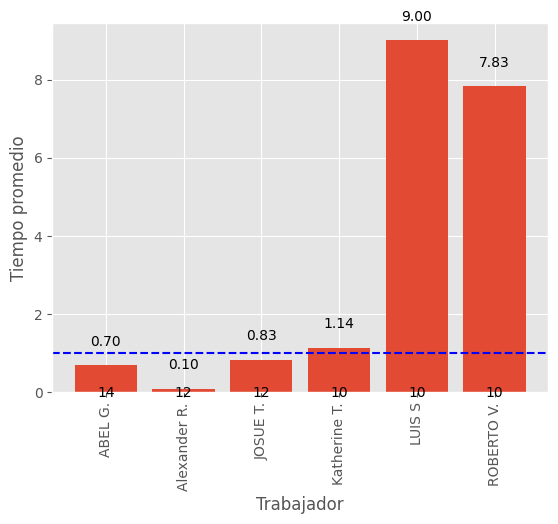

In [ ]:
tiempo_promedio = dt.groupby('DESTINATARIO')['DiasLaborables'].mean()
# Crear el gráfico de barras
plt.bar(range(len(tiempo_promedio)), tiempo_promedio.values)
# Configurar los ejes y las etiquetas
plt.xlabel('Trabajador')
plt.ylabel('Tiempo promedio')
plt.xticks(range(len(tiempo_promedio)), tiempo_promedio.index, rotation='vertical')
# Agregar etiquetas de tiempo promedio
for i, tiempo in enumerate(tiempo_promedio.values):
    plt.text(i, tiempo + 0.5, f'{tiempo:.2f}', ha='center', color='black')
# Agregar etiquetas de cantidad de documentos ingresados en la base del gráfico de barras
plt.bar_label(plt.bar(range(len(cantidad_documentos_sorted)), [0] * len(cantidad_documentos_sorted)), labels=cantidad_documentos_sorted.values,
              label_type='center', color='black')

valor_especifico = 1
plt.axhline(y=valor_especifico, color='blue', linestyle='--', label=f'Valor {valor_especifico}')
# Mostrar el gráfico
plt.show()


   DESTINATARIO             TIPODOC  Cantidad
0       ABEL G.  MEMORANDO MULTIPLE         1
1       ABEL G.            PROVEIDO         9
2  Alexander R.            PROVEIDO        10
3      JOSUE T.            PROVEIDO        12
4  Katherine T.            PROVEIDO        14
5        LUIS S              OFICIO         1
6        LUIS S            PROVEIDO         9
7    ROBERTO V.       HOJA DE ENVIO         1
8    ROBERTO V.             INFORME         2
9    ROBERTO V.            PROVEIDO         9


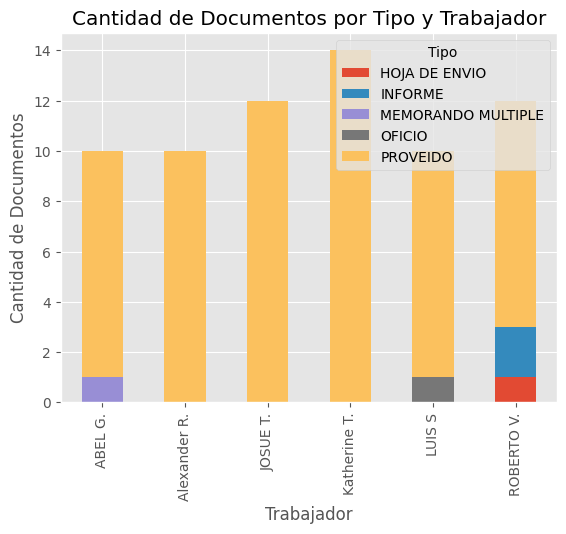

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
dt_grouped = dt.groupby(['DESTINATARIO', 'TIPODOC']).size().reset_index(name='Cantidad')
print(dt_grouped)
table = dt_grouped.pivot(index='DESTINATARIO', columns='TIPODOC', values='Cantidad')
table.plot(kind='bar', stacked=True)
plt.xlabel('Trabajador')
plt.ylabel('Cantidad de Documentos')
plt.title('Cantidad de Documentos por Tipo y Trabajador')
plt.legend(title='Tipo')
plt.show()
#plt.showme graph


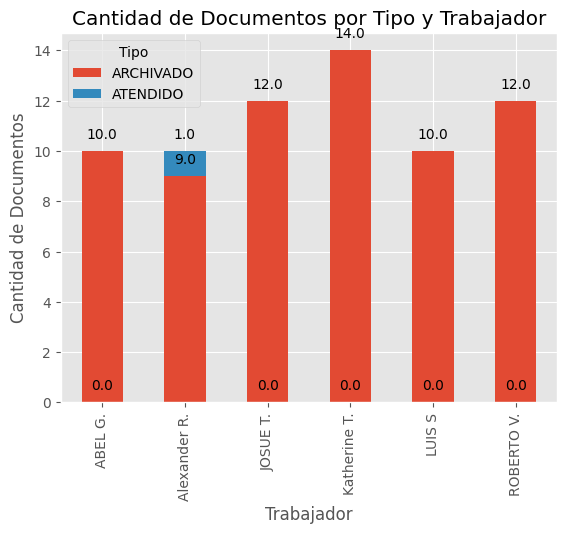

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
# Agrupar y contar la cantidad de documentos
#df_grouped = df.groupby(['responsable_final_1', 'tipo_expediente_1']).size().reset_index(name='Cantidad')
df_grouped = dt.groupby(['DESTINATARIO', 'ESTADO']).size().reset_index(name='Cantidad')
# Crear la tabla
#table = df_grouped.pivot(index='responsable_final_1', columns='tipo_expediente_1', values='Cantidad')
table = df_grouped.pivot(index='DESTINATARIO', columns='ESTADO', values='Cantidad')
# Crear el gráfico
ax = table.plot(kind='bar', stacked=True)
# Etiquetas de los documentos por tipo
#for container in ax.containers:
#    ax.bar_label(container, label_type='center')
# Total encima de cada barra
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.text(x + width/2, y + height + 0.5, height, ha='center')
# Configuración del gráfico
plt.xlabel('Trabajador')
plt.ylabel('Cantidad de Documentos')
plt.title('Cantidad de Documentos por Tipo y Trabajador')
plt.legend(title='Tipo')
# Mostrar el gráfico
plt.show()


In [ ]:
df

,responsable_final,expediente,proveido,solicitante,tipo_expediente,fecha_in_orace,fecha_at_orace,estado,dias_festivos,mes,tipo_expediente_1,fecha_in_orace_nuevo,fecha_at_orace_nuevo,dias_nornal,FechaInicio,FechaFin,DiasLaborables
0,"SEBASTIANI, LUIS",SEGFIN20230002322,NaN,NaN,facil,7/7/23,2023-07-07,ARCHIVADO,2023-08-10,NaN,NaN,2023-07-07,2023-07-07,0,2023-07-07,2023-07-07,0
1,"SEBASTIANI, LUIS",SEGFIN20230002376,NaN,NaN,dificil,7/3/23,2023-07-07,ARCHIVADO,2023-08-12,NaN,NaN,2023-07-03,2023-07-07,4,2023-07-03,2023-07-07,4
2,"SEBASTIANI, LUIS",SEGFIN20230002377,NaN,NaN,duro,7/3/23,2023-07-07,ARCHIVADO,2023-08-12,NaN,NaN,2023-07-03,2023-07-07,4,2023-07-03,2023-07-07,4
3,"SEBASTIANI, LUIS",SEGFIN20230002375,NaN,NaN,facil,7/3/23,2023-07-07,ARCHIVADO,2023-08-12,NaN,NaN,2023-07-03,2023-07-07,4,2023-07-03,2023-07-07,4
4,"SEBASTIANI, LUIS",SEGFIN20230002378,NaN,NaN,dificil,7/3/23,2023-07-07,ARCHIVADO,2023-08-12,NaN,NaN,2023-07-03,2023-07-07,4,2023-07-03,2023-07-07,4
5,"RAMIREZ, ALEXANDER",SEGFIN20230001281,NaN,NaN,duro,7/6/23,2023-07-07,ATENDIDO,2023-08-12,NaN,NaN,2023-07-06,2023-07-07,1,2023-07-06,2023-07-07,1
6,"GUTIERREZ, ABEL",GG-OGP20230002898,NaN,NaN,facil,6/7/23,2023-06-07,ARCHIVADO,2023-08-12,NaN,NaN,2023-06-07,2023-06-07,0,2023-06-07,2023-06-07,0
7,"GUTIERREZ, ABEL",SEGFIN20230001904,NaN,NaN,dificil,6/7/23,2023-06-07,ARCHIVADO,2023-08-12,NaN,NaN,2023-06-07,2023-06-07,0,2023-06-07,2023-06-07,0
8,"TENAZOA, KATTY",RENADE20230000451,NaN,NaN,duro,6/7/23,2023-06-07,ARCHIVADO,2023-08-12,NaN,NaN,2023-06-07,2023-06-07,0,2023-06-07,2023-06-07,0
9,"TAPIA, JOSUE",SGCOPA20230000013,NaN,NaN,facil,6/7/23,2023-06-07,ARCHIVADO,2023-08-12,NaN,NaN,2023-06-07,2023-06-07,0,2023-06-07,2023-06-07,0


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Agrupar y contar la cantidad de documentos
df_grouped = df.groupby(['responsable_final_1', 'tipo_expediente_1']).size().reset_index(name='Cantidad')

# Crear la tabla
table = df_grouped.pivot(index='responsable_final_1', columns='tipo_expediente_1', values='Cantidad')

# Crear el gráfico
ax = table.plot(kind='bar', stacked=True)

# Etiquetas de los documentos por tipo
for container in ax.containers:
    ax.bar_label(container, label_type='center')

# Total encima de cada barra
#for p in ax.patches:
#    width = p.get_width()
#    height = p.get_height()
#    x, y = p.get_xy()
#    ax.text(x + width/2, y + height + 0.5, height, ha='center')

# Configuración del gráfico
plt.xlabel('Trabajador')
plt.ylabel('Cantidad de Documentos')
plt.title('Cantidad de Documentos por Tipo y Trabajador')
plt.legend(title='Tipo')

# Mostrar el gráfico
plt.show()


KeyError: ignored

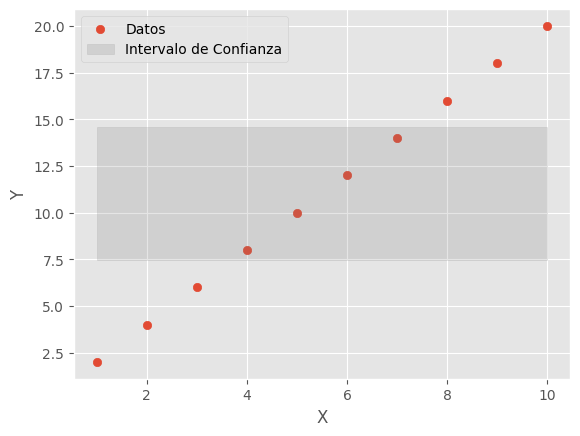

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Datos de ejemplo
x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
y = np.array([2, 4, 6, 8, 10, 12, 14, 16, 18, 20])

# Calcular la media y el desvío estándar
media = np.mean(y)
desvio = np.std(y)

# Calcular el intervalo de confianza (suponiendo una distribución normal)
confianza = 0.95
z = 1.96  # Valor crítico para un intervalo de confianza del 95%

intervalo_sup = media + z * (desvio / np.sqrt(len(y)))
intervalo_inf = media - z * (desvio / np.sqrt(len(y)))

# Crear el gráfico de dispersión
plt.scatter(x, y, label='Datos')

# Dibujar la cota superior e inferior del intervalo de confianza
plt.fill_between(x, intervalo_sup, intervalo_inf, color='gray', alpha=0.2, label='Intervalo de Confianza')

# Configurar las etiquetas y la leyenda
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

# Mostrar el gráfico
plt.show()


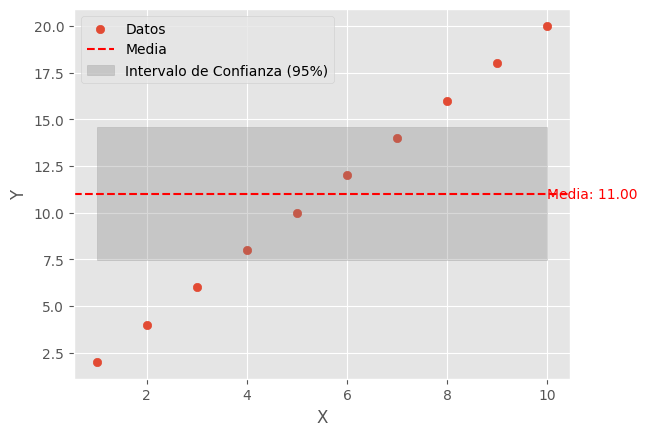

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Crear DataFrame de ejemplo
data = {'x': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
        'y': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20]}
df = pd.DataFrame(data)

# Extraer los datos de las columnas del DataFrame
x = df['x']
y = df['y']

# Calcular la media y el desvío estándar
media = np.mean(y)
desvio_estandar = np.std(y)

# Calcular el intervalo de confianza al 95%
n = len(y)
intervalo_confianza = 1.96 * (desvio_estandar / np.sqrt(n))

# Crear el gráfico de dispersión
plt.scatter(x, y, label='Datos')

# Dibujar una línea horizontal para la media
plt.axhline(media, color='r', linestyle='--', label='Media')

# Agregar el intervalo de confianza al 95%
plt.fill_between(x, media - intervalo_confianza, media + intervalo_confianza,
                 color='gray', alpha=0.3, label='Intervalo de Confianza (95%)')

# Agregar etiquetas a las medidas de tendencia central
plt.text(x.iloc[-1], media, f'Media: {media:.2f}', va='center', ha='left', color='r')

# Configurar las etiquetas y la leyenda
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

# Mostrar el gráfico
plt.show()


In [ ]:
#Método de bootstrap (no se hace suposiciones sobre la distribución de los datos)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.utils import resample

In [ ]:
data = df['DiasLaborables'].values

KeyError: ignored

In [ ]:
def statistic(data):
    return np.mean(data)

In [ ]:
n_iterations = 1000  # Número de iteraciones bootstrap
bootstrap_results = []
for _ in range(n_iterations):
    sample = resample(data)
    result = statistic(sample)
    bootstrap_results.append(result)

In [ ]:
confidence_level = 0.95
lower_limit = np.percentile(bootstrap_results, (1 - confidence_level) / 2 * 100)
upper_limit = np.percentile(bootstrap_results, (1 + confidence_level) / 2 * 100)

In [ ]:
print(lower_limit)
print(upper_limit)

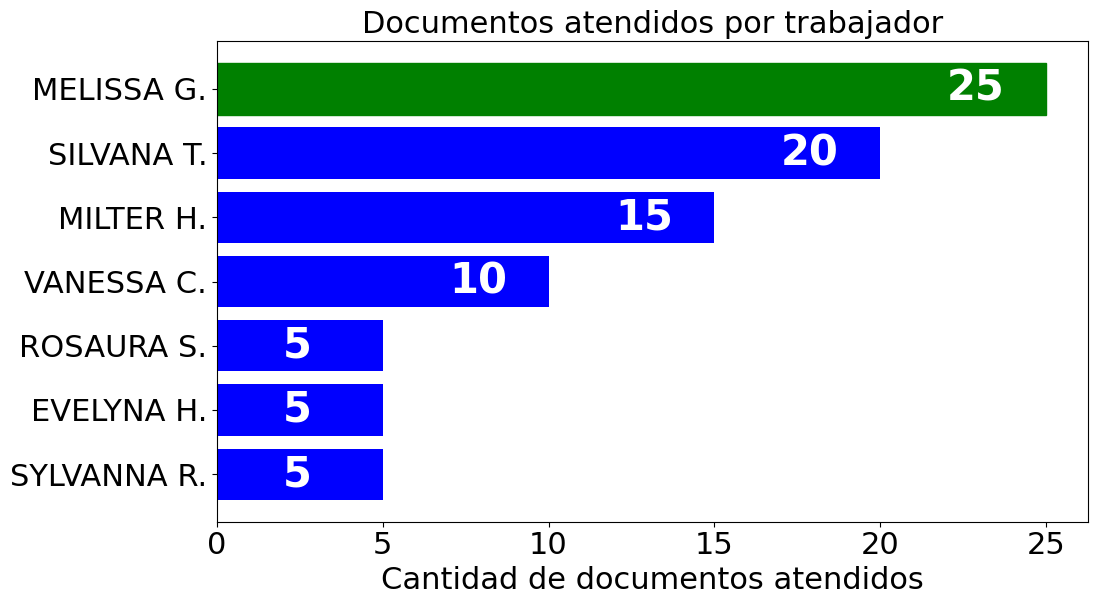

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Datos de ejemplo (puedes reemplazar esto con tus propios datos)
data = [
    {'trabajador': 'MELISSA G.', 'estado': 'atendido', 'cantidad': 25},
    {'trabajador': 'VANESSA C.', 'estado': 'atendido', 'cantidad': 10},
    {'trabajador': 'MILTER H.', 'estado': 'atendido', 'cantidad': 15},
    {'trabajador': 'SILVANA T.', 'estado': 'atendido', 'cantidad': 20},
    {'trabajador': 'SYLVANNA R.', 'estado': 'atendido', 'cantidad': 5},
    {'trabajador': 'EVELYNA H.', 'estado': 'atendido', 'cantidad': 5},
    {'trabajador': 'ROSAURA S.', 'estado': 'atendido', 'cantidad': 5}
]

# Filtrar los datos por el estado 'atendido'
documentos_atendidos = [d['cantidad'] for d in data if d['estado'] == 'atendido']
trabajadores_atendidos = [d['trabajador'] for d in data if d['estado'] == 'atendido']

# Ordenar los datos de menor a mayor
sorted_indices = np.argsort(documentos_atendidos)
documentos_atendidos = np.array(documentos_atendidos)[sorted_indices]
trabajadores_atendidos = np.array(trabajadores_atendidos)[sorted_indices]

# Crear el gráfico de barras horizontales
plt.figure(figsize=(10, 6))
bars = plt.barh(trabajadores_atendidos, documentos_atendidos, color='blue')

# Encontrar el índice del trabajador con la mayor cantidad de documentos atendidos
indice_max = np.argmax(documentos_atendidos)

# Resaltar la barra del trabajador con la mayor cantidad
bars[indice_max].set_color('green')

# Ajusta el ancho de las barras y el tamaño de la fuente
bar_width = 10  # Ajusta el ancho de las barras según tu preferencia
font_size = 22  # Ajusta el tamaño de la fuente según tu preferencia
label_font_size = 30  # Ajusta el tamaño de la fuente para las etiquetas de las barras

# Agregar etiquetas en negrita
for bar in bars:
    width = bar.get_width()
    plt.text(width -3, bar.get_y() + bar.get_height()/2, f'{width}', va='center', fontweight='bold',fontsize=label_font_size, color="white")

plt.xlabel('Cantidad de documentos atendidos',fontsize=font_size)
#plt.ylabel('Trabajadores',fontsize=font_size)
plt.title('Documentos atendidos por trabajador',fontsize=font_size)
plt.tight_layout()
plt.xticks(fontsize=font_size)
plt.yticks(fontsize=font_size)

# Mostrar el gráfico
plt.show()


In [ ]:
# Nombre del archivo de salida en formato EPS
eps_output_path = 'mi_grafico.eps'

# Exporta el gráfico en formato EPS
plt.savefig(eps_output_path, format='eps', bbox_inches='tight')

from google.colab import files

# Descarga el archivo EPS
files.download(eps_output_path)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 640x480 with 0 Axes>

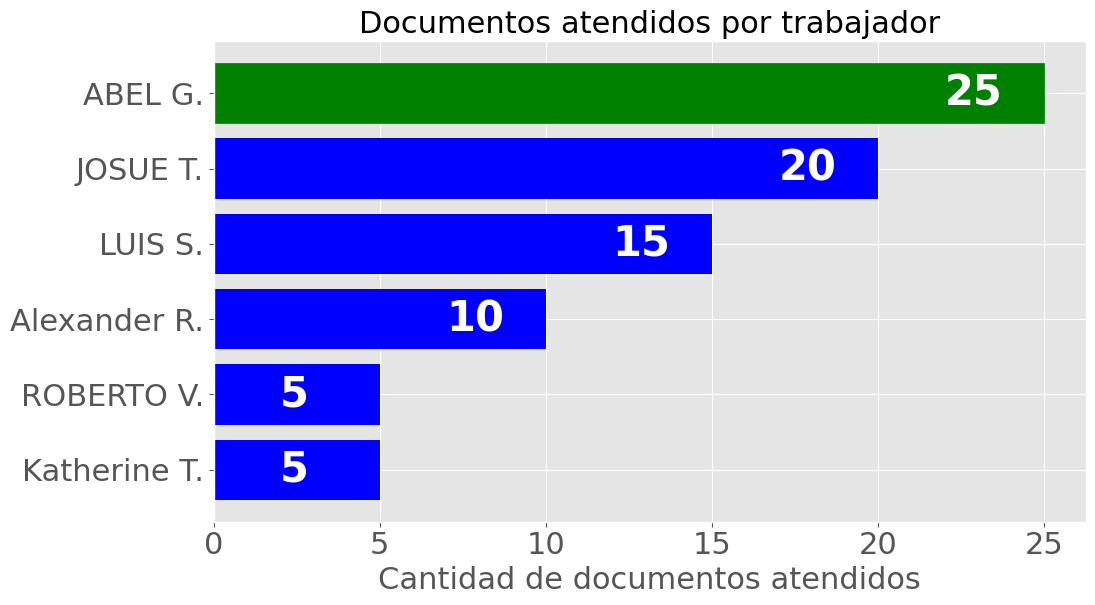

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Datos de ejemplo (puedes reemplazar esto con tus propios datos)
#data = [
#    {'trabajador': 'ABEL G.', 'estado': 'atendido', 'cantidad': 25},
#    {'trabajador': 'Alexander R.', 'estado': 'atendido', 'cantidad': 10},
#    {'trabajador': 'LUIS S.', 'estado': 'atendido', 'cantidad': 15},
#    {'trabajador': 'JOSUE T.', 'estado': 'atendido', 'cantidad': 20},
#    {'trabajador': 'Katherine T.', 'estado': 'atendido', 'cantidad': 5},
#    {'trabajador': 'ROBERTO V.', 'estado': 'atendido', 'cantidad': 5}
#]

# Filtrar los datos por el estado 'atendido'
documentos_atendidos = [d['cantidad'] for d in data if d['estado'] == 'atendido']
trabajadores_atendidos = [d['trabajador'] for d in data if d['estado'] == 'atendido']

# Ordenar los datos de menor a mayor
sorted_indices = np.argsort(documentos_atendidos)
documentos_atendidos = np.array(documentos_atendidos)[sorted_indices]
trabajadores_atendidos = np.array(trabajadores_atendidos)[sorted_indices]

# Crear el gráfico de barras horizontales
plt.figure(figsize=(10, 6))
bars = plt.barh(trabajadores_atendidos, documentos_atendidos, color='blue')

# Encontrar el índice del trabajador con la mayor cantidad de documentos atendidos
indice_max = np.argmax(documentos_atendidos)

# Resaltar la barra del trabajador con la mayor cantidad
bars[indice_max].set_color('green')

# Agregar etiquetas en negrita
for bar in bars:
    width = bar.get_width()
    plt.text(width -3, bar.get_y() + bar.get_height()/2, f'{width}', va='center', fontweight='bold',fontsize=label_font_size, color="white")

plt.xlabel('Cantidad de documentos atendidos',fontsize=font_size)
#plt.ylabel('Trabajadores',fontsize=font_size)
plt.title('Documentos atendidos por trabajador',fontsize=font_size)
plt.tight_layout()
plt.xticks(fontsize=font_size)
plt.yticks(fontsize=font_size)

# Mostrar el gráfico
plt.show()
